## Final Project Submission

Please fill out: 
* Student name: Farnaz Golnam
* Student pace: full time
* Scheduled project review date/time: March 30, 1.5pm(PSD)
* Instructor name: Rafael Carrasco
* Blog post URL: to be updated


# Project We Are Working on:

## Costumer Churn Data

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. Note that this is a binary classification problem.

# Importing Libraries

In [23]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

#SCIKIT LEARN
#Scikit-learn is a machine learning toolkit that provides various tools to cater to different aspects of machine
#learning e.g. Classification, Regression, Clustering, Dimensionality reduction, Model selection, Preprocessing.
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#train test split
from sklearn.model_selection import train_test_split

#k-fold cross validation
from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

# FUNCTIONS
#from cf_matrix import make_confusion_matrix
#from mod5project_functions import plot_histograms

# Importing and Cleaning Data 

In [24]:
#import Data
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Changin column names to a python format

In [25]:
# First thing is to change the column names in order to remove " " between parts
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [26]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Cleaning Checklist:
1.check for Missing data and placeholders.


2.check for data type : Numeric(int/float), Str, bool and also we check for date/time data as well.


3.check for categorical data and dummy variables.


4.check for duplicates and outliers.


5.Check for collinearity.


6.check for data distribution.


7.check for class imbalancement.

### 1.Check for data types

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

 ### Changing data types
 
 1. We have "Voice mail plan" and "International Plan" that are objects but their data are yes/no, so we can replace them with 0/1 by converting them to int type.
 
 2. "Churn" column is also boolean and can be replaced with 0/1.
 

In [28]:
data["international_plan"]=data.international_plan.replace("yes","1").replace("no","0")
data["international_plan"]=data.international_plan.astype(int)

data["voice_mail_plan"]=data.voice_mail_plan.replace("yes","1").replace("no","0").astype(int)

data["churn"]=data.churn.replace("True","1").replace("False","0")
data["churn"]=data.churn.astype(int)

#data.international_plan.head() 
#data.voice_mail_plan.head()
#data.churn.head()

In [31]:
data.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [96]:
# How to change the name of states to numbers ????

# 1.pd.get_dummies(data, columns=['state', 'area_code'], drop_first=True)
# it gves us a dataframe with 71 coulumns due to adding 50 dummy variable columns

# 2.labelencoding the state column to transfer text to number and change the datatype to integer
# we will then apply One-Hot-Encoding to create dummy columns and equalize the relationship between those numbers so they
# can be treated equally by the model to predict accurate results (later in the process through column_transformer)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["state"]=le.fit_transform(data["state"])
data.state.values

array([16, 35, 31, ..., 39,  6, 42], dtype=int64)

In [95]:
# How to change the phone-numbers to unique numbers ????
# we decide to drop phone_numbers from the columns to prevent unnecessary complexity

# feature_columns:
x=data.drop(['churn','phone_number'],axis=1)
x.head()

# target_variable:
y=data.churn

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [92]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#column_trans=make_column_transformer((OneHotEncoder(),['area_code','state']),remainder='passthrough')
#column_trans.fit_transform(x)


column_trans = make_column_transformer(
    (['', ''], StandardScaler()),
    (['', '', ''], OneHotEncoder())
)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (['state','area_code'], OneHotEncoder()))
preprocess.fit_transform(x)

C:\Users\farnaz\Anaconda3\envs\learn-env\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
C:\Users\farnaz\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg

<3333x54 sparse matrix of type '<class 'numpy.float64'>'
	with 6666 stored elements in Compressed Sparse Row format>

In [60]:
#x.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### 2. Check for missing data and placeholders

In [106]:
print(data.shape)
data.isna().sum()

(3333, 21)


state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

### as we can see we dont have any missing data but it cant guaranree that there is no placeholder as well, so we quickly check all values of columns for placeholders

In [237]:
#check for place holders

for column in data:
    #Select column contents by column name using [] operator
    columnSeriesdf = data[column]
    print('Colunm Name : ', column)
    print('Column Contents : ', columnSeriesdf.unique())

Colunm Name :  state
Column Contents :  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Colunm Name :  account_length
Column Contents :  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 19

#### we found nothing strange, so we have a dataset with no missing data and no place holders, FANTASTIC!

### 3. Check for outliers and categorical data

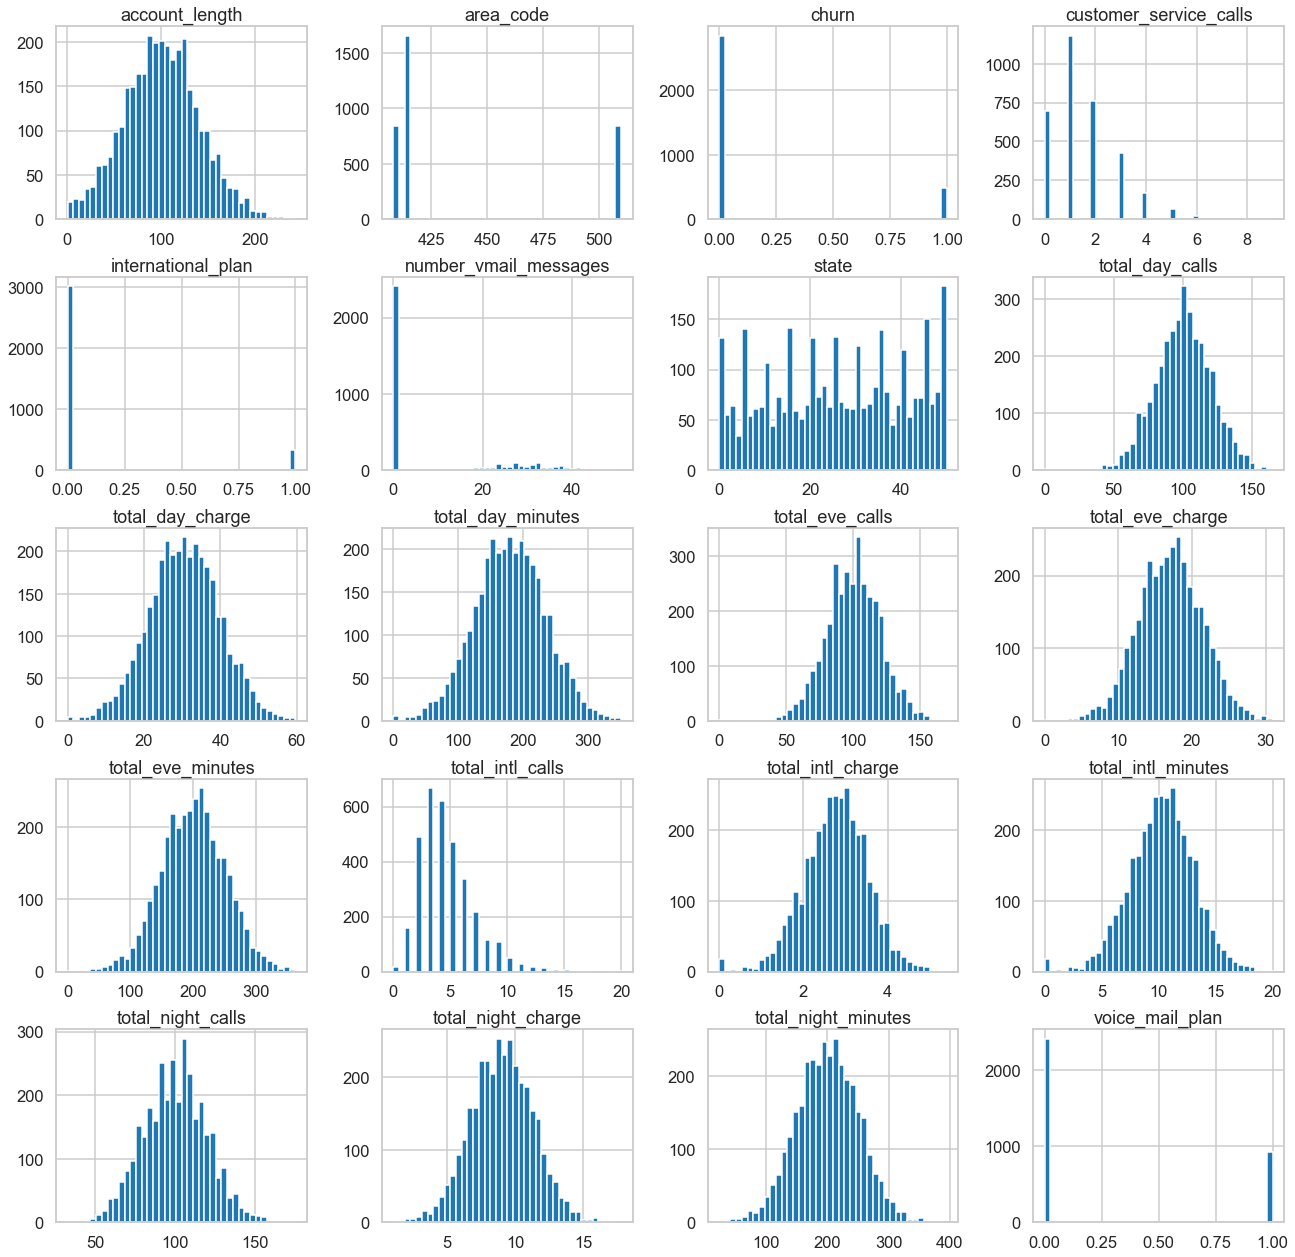

In [107]:
# to plot histograms all the required features should be numeric and integers, otherwise it cant be shown.

# for a binomial dataset with data like number_vmail_messages, we can splite the dataframe to a upper with number_vmail_messages
# more than 20 and lower with number_vmail_messages less than 20 and create two models for upper and lower parts. deleting
# all zeros as outlier cause to ignore a huge number of data, So probably dropping them is not an option.

data.hist(bins= 40, figsize  = [22, 22])
plt.show()

#fig, axes = plt.subplots(nrows=5, ncols=4)
#data.plot(subplots=True, ax=axes)

### Log transfer

### Scaling
>We'll do this to ensure that features on different scales do not have an outsized impact on our model's results.

>to keep all the scales between 0 to 1 we use StandardScaler().

>thus,categorical data with categories 0 and 1 dont need any scaling.

In [116]:
#features_for_scaling
f_scale=data.drop(['voice_mail_plan','international_plan','churn','phone_number'], axis=1)
f_scale.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [120]:
# should we scale all the categorical features too (pass x feature dataframe) or not ( only pass f_scale dataframe) ??? 
# both categorical data with zero-one categories and also categorical data with more than two categories ???

scaler=StandardScaler()
scaled_f= scaler.fit_transform(x)

scaled_data = pd.DataFrame(scaled_f, columns = x.columns)
scaled_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,-0.678649,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.603170,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.333313,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,0.603170,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,0.670634,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


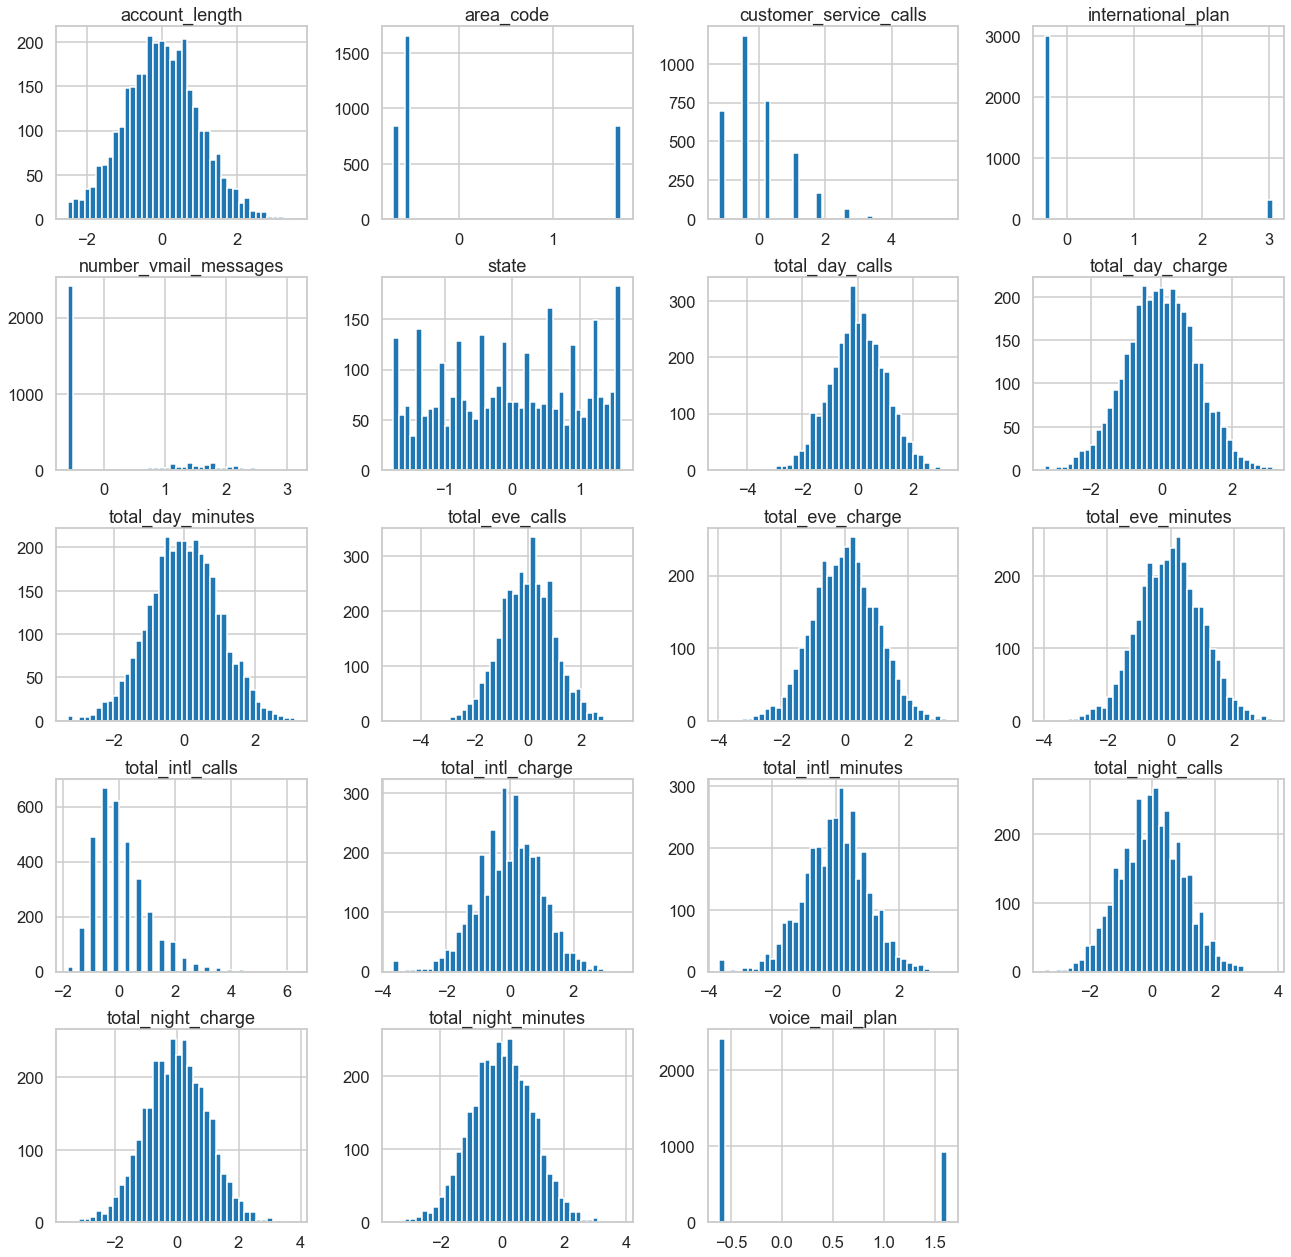

In [121]:
# take a quick look at our scaled feature variables:

scaled_data.hist(bins= 40, figsize  = [22, 22])
plt.show();

In [252]:
data.area_code.value_counts()

1    1655
2     840
0     838
Name: area_code, dtype: int64

#### based on the histograms, we have 3 categorical features:

>1. area_code with 3 categories 408, 415 and 510

>2. voice_mail_plan with 1 or 0 which means yes or no 

>3. international_plan with 1 or 0 which means yes or no

>4. state with 50 numbers for each state

#### our target data is also binary:

>5. churn 1 or 0 which means yes or no


#### All machine learning models are some kind of mathematical model that need numbers to work with. This is one of the primary reasons we need to pre-process the categorical data before we can feed it to machine learning models.

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#column_trans=make_column_transformer((OneHotEncoder(),['area_code','state']),remainder='passthrough')
#column_trans.fit_transform(x)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

column_trans = make_column_transformer((['', ''], StandardScaler()),(['', '', ''], OneHotEncoder()))
column_trans.fit_transform(x)

In [248]:
#QUESTION: do i need to do label encoding when they are numerical???????

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["area_code"]=le.fit_transform(data["area_code"])
data.area_code.values

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

In [266]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(data["area_code"].values.reshape(-1, 1)).toarray() 

C:\Users\farnaz\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [122]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(data["state"].values.reshape(-1, 1)).toarray() 

C:\Users\farnaz\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

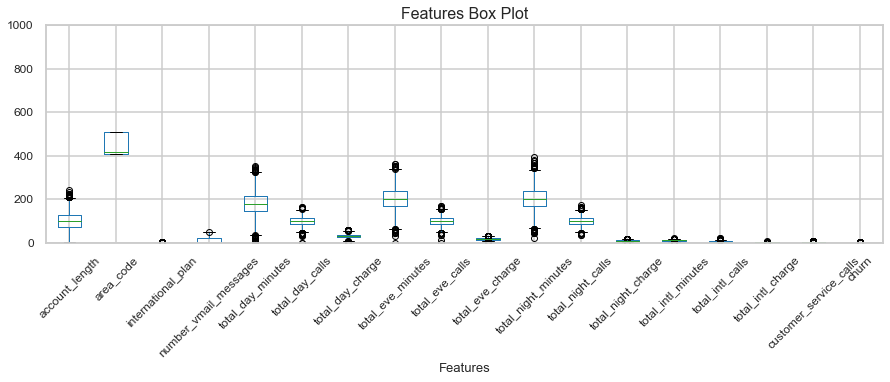

In [169]:
data.boxplot(figsize=(15,4), rot = 45)
plt.xlabel('Features', size = 13)
plt.title('Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,1000);

In [ ]:
# outliers

4. Check for collinearity

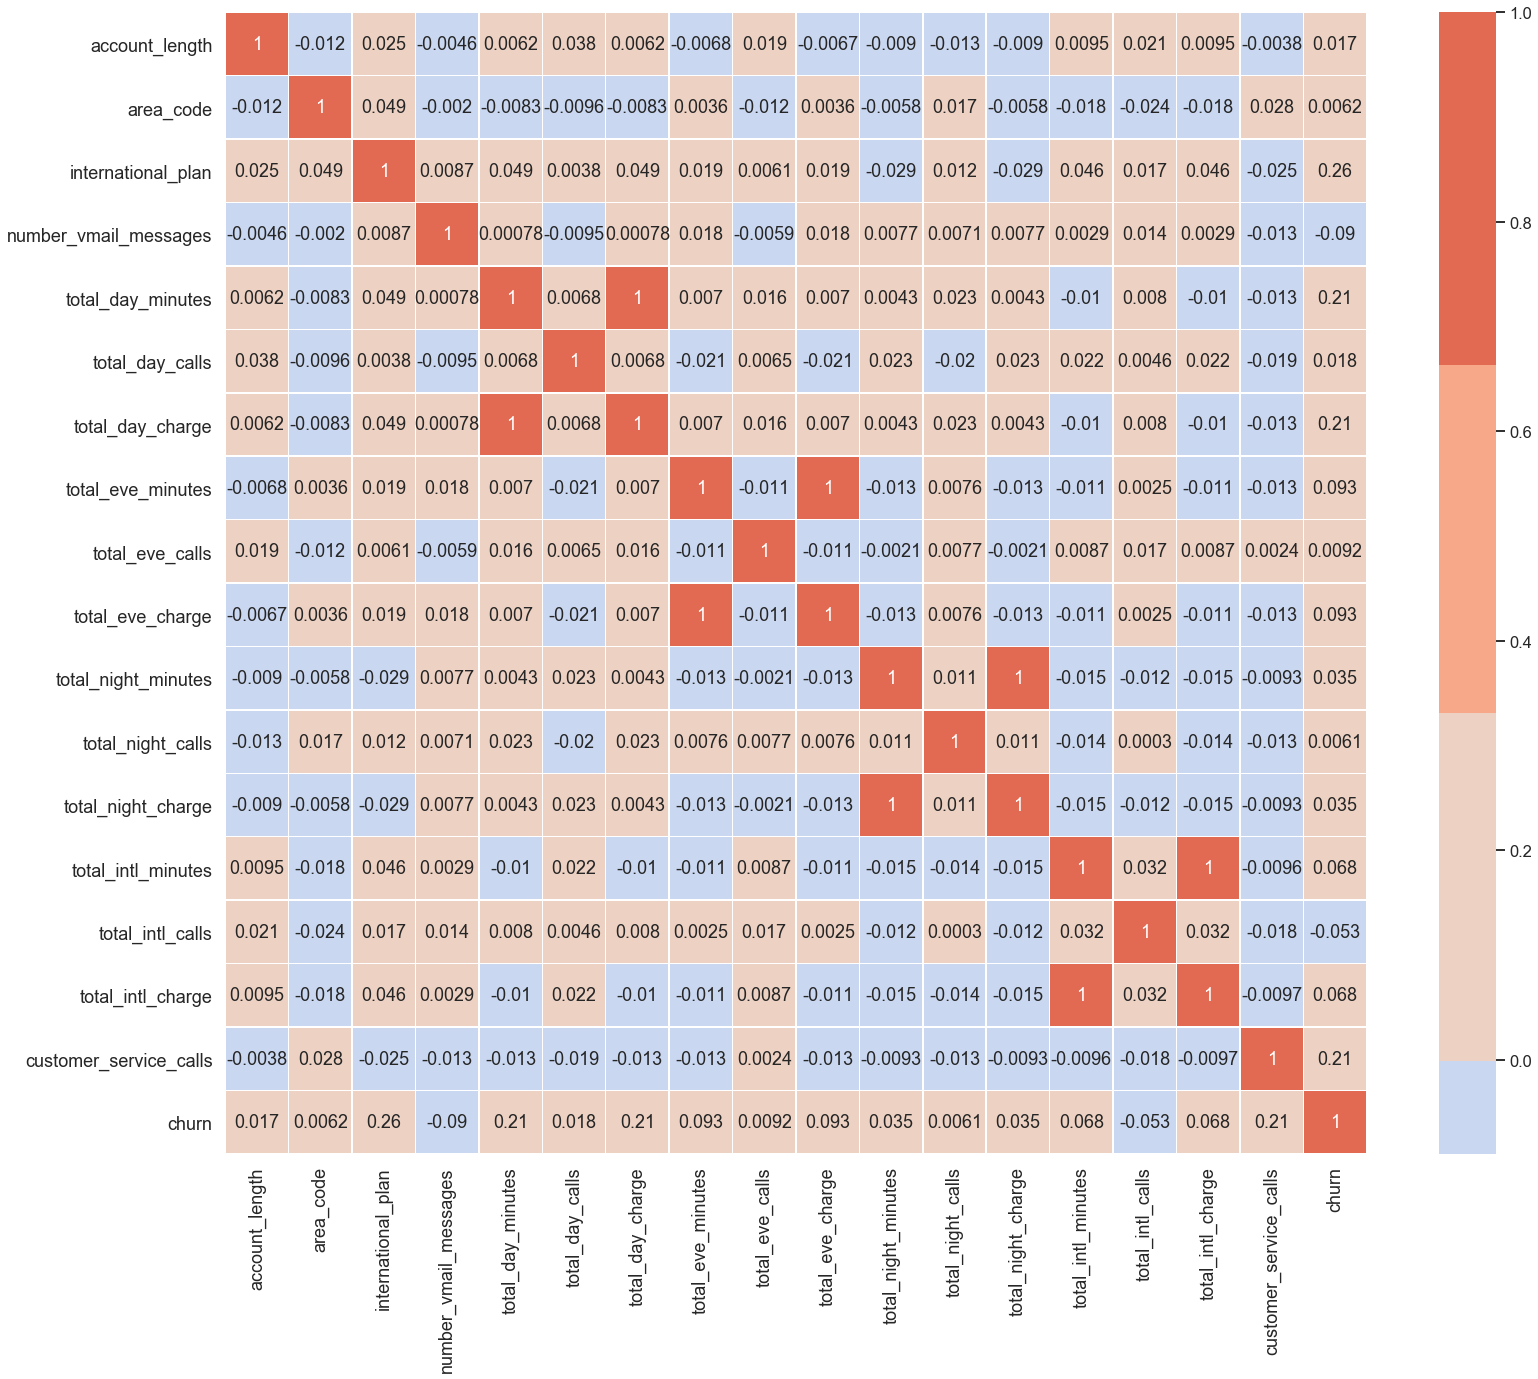

In [192]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(26,21))
ax= sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette('coolwarm'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

### 5. Check for class imbalancement
let's take a quick look at a countplot of our target classes to determine if rebalancing the data set in the modeling portion is needed:

0    2850
1     483
Name: churn, dtype: int64


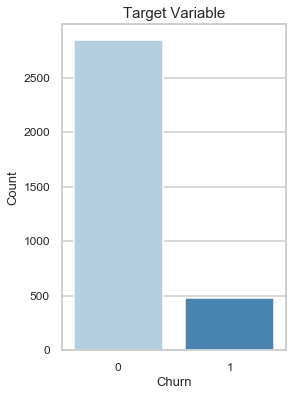

In [145]:
y = data.churn
print(y.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Target Variable', size = 15)
plt.xlabel('Churn', size = 13)
plt.ylabel('Count', size = 13);

Based on the 0 and 1 ratio of our target, we'll need to conduct some rebalancing on the data set. We'll do this in the rebalancing portion of the modeling section below.

### Next separate out the target/y from the feature variables/x:

In [193]:
x = data.drop(columns = 'churn')
y = data.churn
data_f.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# can we predict the cancellation requests given the service information:
# defined x and y
# feature_cols=['']
# x=data[feature_cols]
# y=data.churn

In [ ]:
# split x and y into training and testing sets:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
# train a logistic regression model on the training set
from sklearn.cross_validation import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train, y_train)

In [ ]:
# make class predictions for the testing set
y_pred_class=logreg.predict(x_test)

In [ ]:
# calculate the classification accuracy: percentage of correct predictions
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# calculating the null accuracy that could be achieved by always predicting the most frequent class
# 1. examine the class distribution of the testing set(using a pandas series method)
y_test.value_count()
# 2. calculate the percentage of ones
y_test.mean()
# 3. calculate the percentage of zeros
1 - y_test.mean()
# 4. calculate null accuracy(for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

In [ ]:
# comparing the true and predicted response values
print "True:" , y_test.values[0:25]
print "Pred:" ,y_pred_class[0:25]

In [ ]:
# CONFUSION MATRIX
# first argument is true values, second arguments is predicted values
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
# print the first 25 true and predicted responses
# print "True:", y_test.values[0:25]
# print "Pred:", y_pred_class[0:25]

In [ ]:
# save confusion matrix and slice into four pieces
#confusion=metrics.confusion_matrix(y_test, y_pred_class)
#TP= confusion[1,1]
#TN= confusion[0,0]
#FP= confusion[0,1]
#FN= confusion[1,0]

In [ ]:
# we can also use pipeline: